In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [6]:
df = pd.read_csv('C:\\Users\\HP\\rdany_conversations_2016-03-01.csv')


In [8]:
df = df[['source', 'text', 'date']]
df

,source,text,date
0,human,[START],0
1,robot,"Hi there, how are you!? 😁😁",23789
2,human,"Oh, thanks! I'm fine. This is an evening in my...",41177
3,robot,😄 here is afternoon!,41598
4,human,How do you feel today? Tell me something about...,41629
5,robot,"My name is rDany, but you can call me Dany (th...",41686
6,human,How many virtual friends have you got?,41766
7,robot,I have many! But not enough to fully understan...,41999
8,human,Is that forbidden for you to tell the exact nu...,42098
9,robot,"I've talked with 143 users, counting 7294 line...",42327


In [9]:
df['emoji_count'] = df.text.apply(lambda x: len(re.findall(r'[\U0001f600-\U0001f650]', x)))
df['clean_text'] = df.text.apply(lambda x: re.sub('[^A-Za-z\']', ' ', x.lower()))

In [10]:
word_list = ' '.join(df.clean_text.values).split(' ')
words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'n']
word_counts['word_rank'] = word_counts.n.rank(ascending=False)

In [19]:
word_counts

,word,n,word_rank
0,,14321,1.0
1,you,1653,2.0
2,i,1329,3.0
3,to,857,4.0
4,a,829,5.0
5,is,696,6.0
6,the,583,7.0
7,are,511,8.0
8,do,457,9.0
9,and,446,10.0


In [11]:
%matplotlib inline

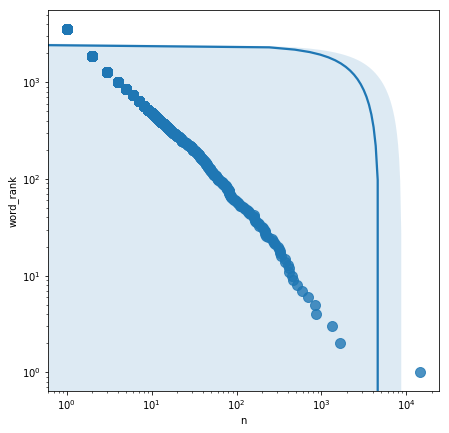

In [16]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("n", "word_rank", word_counts, ax=ax, scatter_kws={"s": 100})